### Which ML Models are sensitive  to Outliers ?
1. Naivye Bayes Classifier ----------------- Not Sensitive to outliers
2. SVM ------------------------------------- Not Sensitive
3. Linear Regression ----------------------- Yes, Sensitive to outliers
4. Logistic Regression --------------------- Yes, Sensitive to outliers
5. Decision Tree Regression or Classifier -- Not Sensitive
6. Ensemble (RF, XGBoost, GB) -------------- Not Sensitive
7. KNN ------------------------------------- Not Sensitive
8. Kmeans ---------------------------------- Yes, Sensitive
9. Hierarical ------------------------------ Yes, Sensitive
10. PCA ------------------------------------ Yes, Sensitive
11. Neural Network ------------------------- Yes, Sensitive

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

C:\Users\sjain191\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

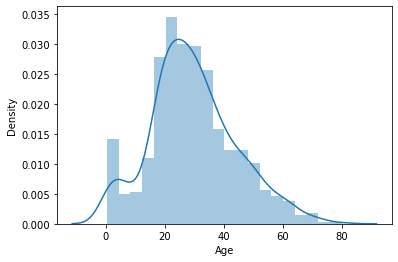

In [4]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

C:\Users\sjain191\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

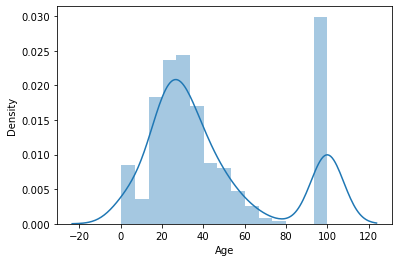

In [5]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'no. of passanger')

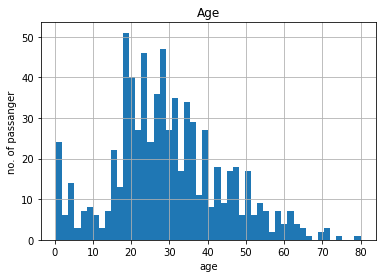

In [6]:
#Gaussian Distribution
figure=df['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('age')
figure.set_ylabel('no. of passanger')

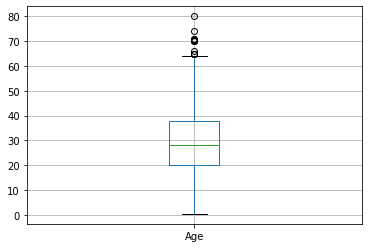

In [7]:
figure = df.boxplot('Age')

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## If data is normally distributed use blow given method:

In [9]:
## Assuming Age follows a Gaussian distribution. we will calculate the boundaries which differentiates the outliers
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()
print(upper_boundary,"  ",lower_boundary," ",df['Age'].mean())

73.27860964406095    -13.88037434994331   29.69911764705882


In [10]:
## Lets compute the interquantile range to calculate the boundaries
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [13]:
# Extreme Outliers:
lower_bridge = df['Age'].quantile(0.25) - (3 * IQR)
upper_bridge = df['Age'].quantile(0.75) + (3 * IQR)
print(lower_bridge),print(upper_bridge)

-33.5
91.625


(None, None)

In [14]:
lower_bridge = df['Age'].quantile(0.25) - (1.5 * IQR)
upper_bridge = df['Age'].quantile(0.75) + (1.5 * IQR)
print(lower_bridge),print(upper_bridge)

-6.6875
64.8125


(None, None)

## if features are skewes we use below given technique:

Text(0, 0.5, 'no. of passanger')

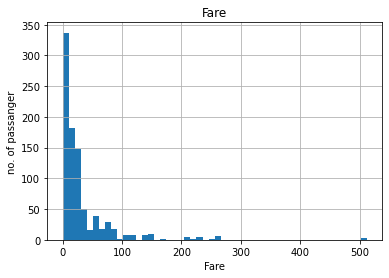

In [15]:
# Features is Skewed
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('no. of passanger')

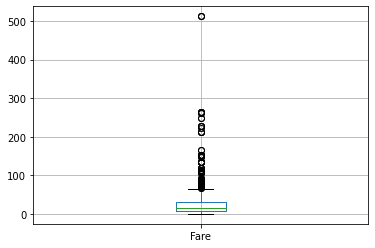

In [16]:
figure = df.boxplot('Fare')

In [17]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [20]:
lower_bridge = df['Fare'].quantile(0.25) - (3 * IQR)
upper_bridge = df['Fare'].quantile(0.75) + (3 * IQR)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [26]:
data = df.copy()

In [27]:
data.loc[data['Age']>=73,'Age'] = 73
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data.loc[data['Fare']>=100,'Fare'] = 100
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'no. of passanger')

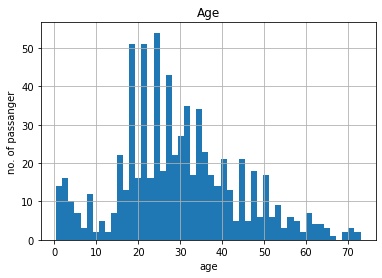

In [29]:
#After replacing outliers
figure=data['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('age')
figure.set_ylabel('no. of passanger')

Text(0, 0.5, 'no. of passanger')

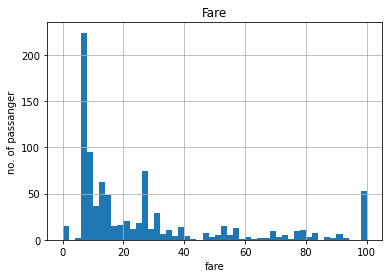

In [30]:
#After replacing outliers
figure=data['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('fare')
figure.set_ylabel('no. of passanger')

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy :',accuracy_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred1[:,1]))

Accuracy : 0.7201492537313433
roc_auc_score : 0.7431200701139352


In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy :',accuracy_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred1[:,1]))

Accuracy : 0.6940298507462687
roc_auc_score : 0.7263219398188724
